# Yolov9 Custom Training for Pothole Detection

We have used L4 GPU.  nvidia-smi by this command you can check the GPU and CUDA version. In case of any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save

In [1]:
!nvidia-smi

Tue Sep  3 16:51:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   36C    P8              11W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

To make it easier for us to manage datasets, images and models we create a HOME constant.

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Research/Pothole


To use the google drive for easily access the dataset, model or store the results.

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%cd /content/drive/MyDrive/Research/Pothole

/content/drive/MyDrive/Research/Pothole


In [ ]:
!ls

New.ipynb  Pothole_YOLOv8.ipynb  yolov9  YOLOV9Implementation.ipynb


In [ ]:
%cd /content

/content


Next, need to download the model weights. Only the v9-C and v9-E weights are available at the moment. Before use the models weights, need to download them using the following commands:

In [4]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
#!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
#!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
#!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls

benchmarks.py  export.py   panoptic	     segment	      utils
classify       figure	   README.md	     train_dual.py    val_dual.py
data	       hubconf.py  requirements.txt  train.py	      val.py
detect.py      models	   scripts	     train_triple.py  val_triple.py


YOLOv9 is very new. For using this model need to clone from the main repository

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 1.81 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/drive/MyDrive/My research/Pothole/MWPD/yolov9


## Custom Training on YOLOv9 Architecture

My research

Exp 1 for 30 epochs

In [ ]:
%cd {HOME}/yolov9

!python train_dual.py \
--batch 8 --epochs 30 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/Research/Pothole/yolov9/PD/data.yaml\
--weights /content/weights/yolov9-c.pt \
--cfg /content/drive/MyDrive/Research/Pothole/yolov9/models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/content/drive/MyDrive/Research/Pothole/yolov9
2024-08-31 14:44:45.065918: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-31 14:44:45.083742: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 14:44:45.105202: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-31 14:44:45.111657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-31 14:44:45.1270

In [ ]:
!ls {HOME}/yolov9/runs/train/exp8/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1725115507.a24e5e1384a5.1463.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


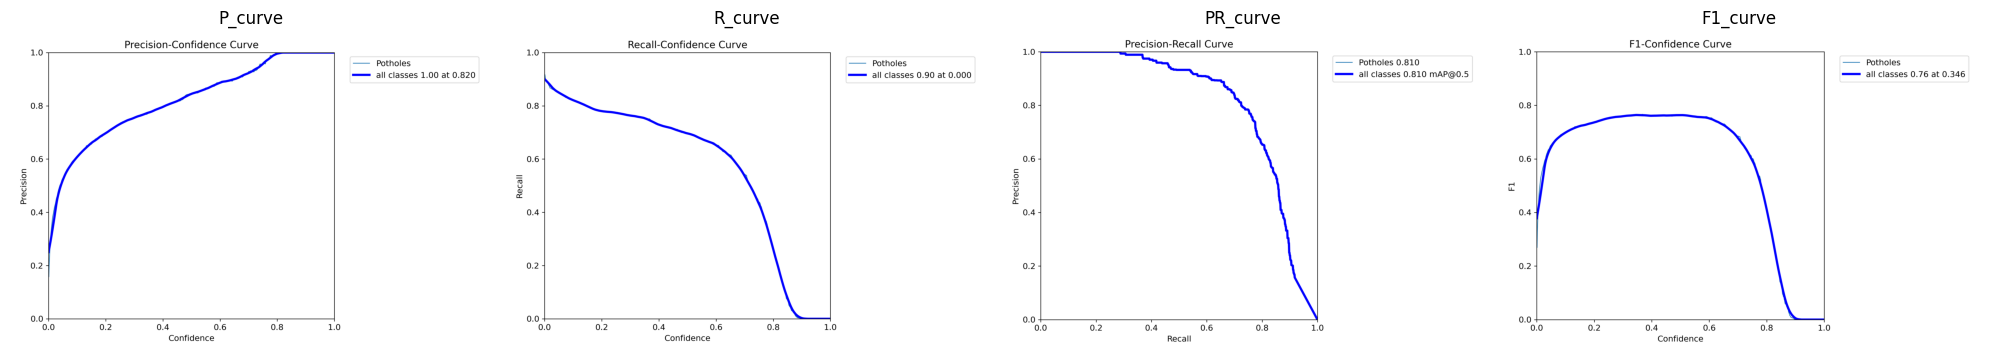

In [9]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

# Path to the folder containing the curve images
folder_path = '/content/drive/MyDrive/Research/Pothole/yolov9/runs/train/exp8/'

# List of image filenames
images = ['P_curve.png', 'R_curve.png', 'PR_curve.png', 'F1_curve.png']

# Create a figure and subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 8))

# Loop through images and display them in subplots
for i, image_name in enumerate(images):
    # Load the image
    img = mpimg.imread(os.path.join(folder_path, image_name))
    # Display the image in the corresponding subplot
    axs[i].imshow(img)
    # Remove axis for clarity
    axs[i].axis('off')
    # Set title for each subplot
    axs[i].set_title(image_name.split('.')[0])

# Adjust layout
plt.tight_layout()
plt.show()


Exp 2 for 50 epochs

In [ ]:
%cd {HOME}/yolov9

!python train_dual.py \
--batch 8 --epochs 50 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/Research/Pothole/yolov9/PD/data.yaml\
--weights /content/weights/yolov9-c.pt \
--cfg /content/drive/MyDrive/Research/Pothole/yolov9/models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/content/drive/MyDrive/Research/Pothole/yolov9
2024-09-02 08:12:44.088087: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-02 08:12:44.106456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 08:12:44.128423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 08:12:44.135052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 08:12:44.1507

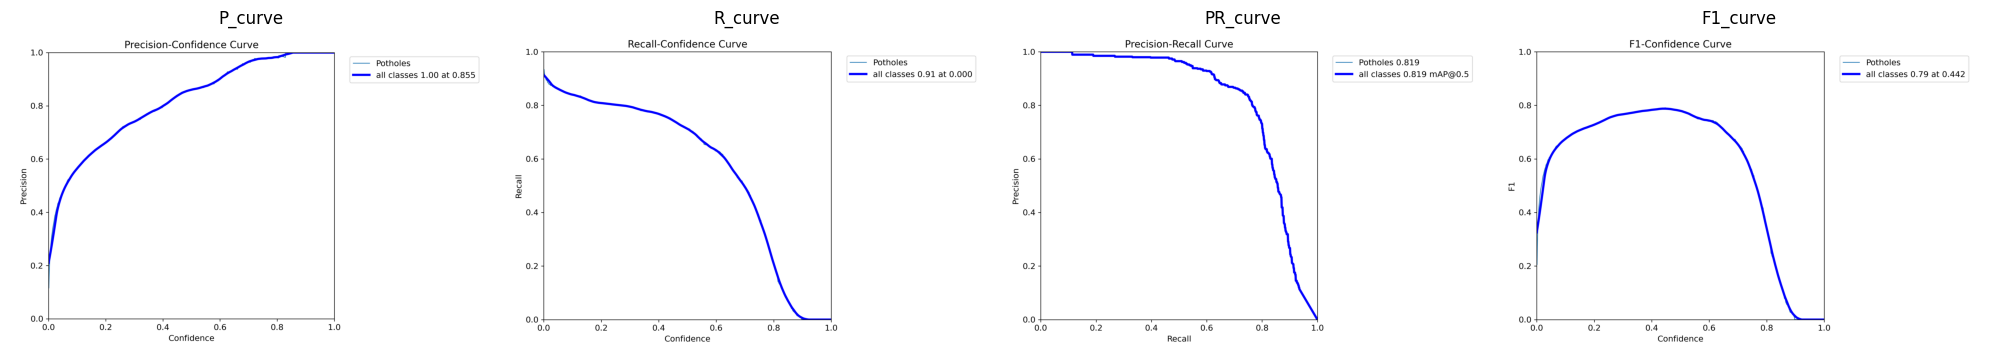

In [10]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

# Path to the folder containing the curve images
folder_path = '/content/drive/MyDrive/Research/Pothole/yolov9/runs/train/exp9/'

# List of image filenames
images = ['P_curve.png', 'R_curve.png', 'PR_curve.png', 'F1_curve.png']

# Create a figure and subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 8))

# Loop through images and display them in subplots
for i, image_name in enumerate(images):
    # Load the image
    img = mpimg.imread(os.path.join(folder_path, image_name))
    # Display the image in the corresponding subplot
    axs[i].imshow(img)
    # Remove axis for clarity
    axs[i].axis('off')
    # Set title for each subplot
    axs[i].set_title(image_name.split('.')[0])

# Adjust layout
plt.tight_layout()
plt.show()

Exp3 for 100 epochs

In [ ]:
%cd {HOME}/yolov9

!python train_dual.py \
--batch 8 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/Research/Pothole/yolov9/PD/data.yaml\
--weights /content/weights/yolov9-c.pt \
--cfg /content/drive/MyDrive/Research/Pothole/yolov9/models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/content/drive/MyDrive/Research/Pothole/yolov9
2024-08-14 13:35:42.038090: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-14 13:35:42.055873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-14 13:35:42.076827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-14 13:35:42.083281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-14 13:35:42.0987

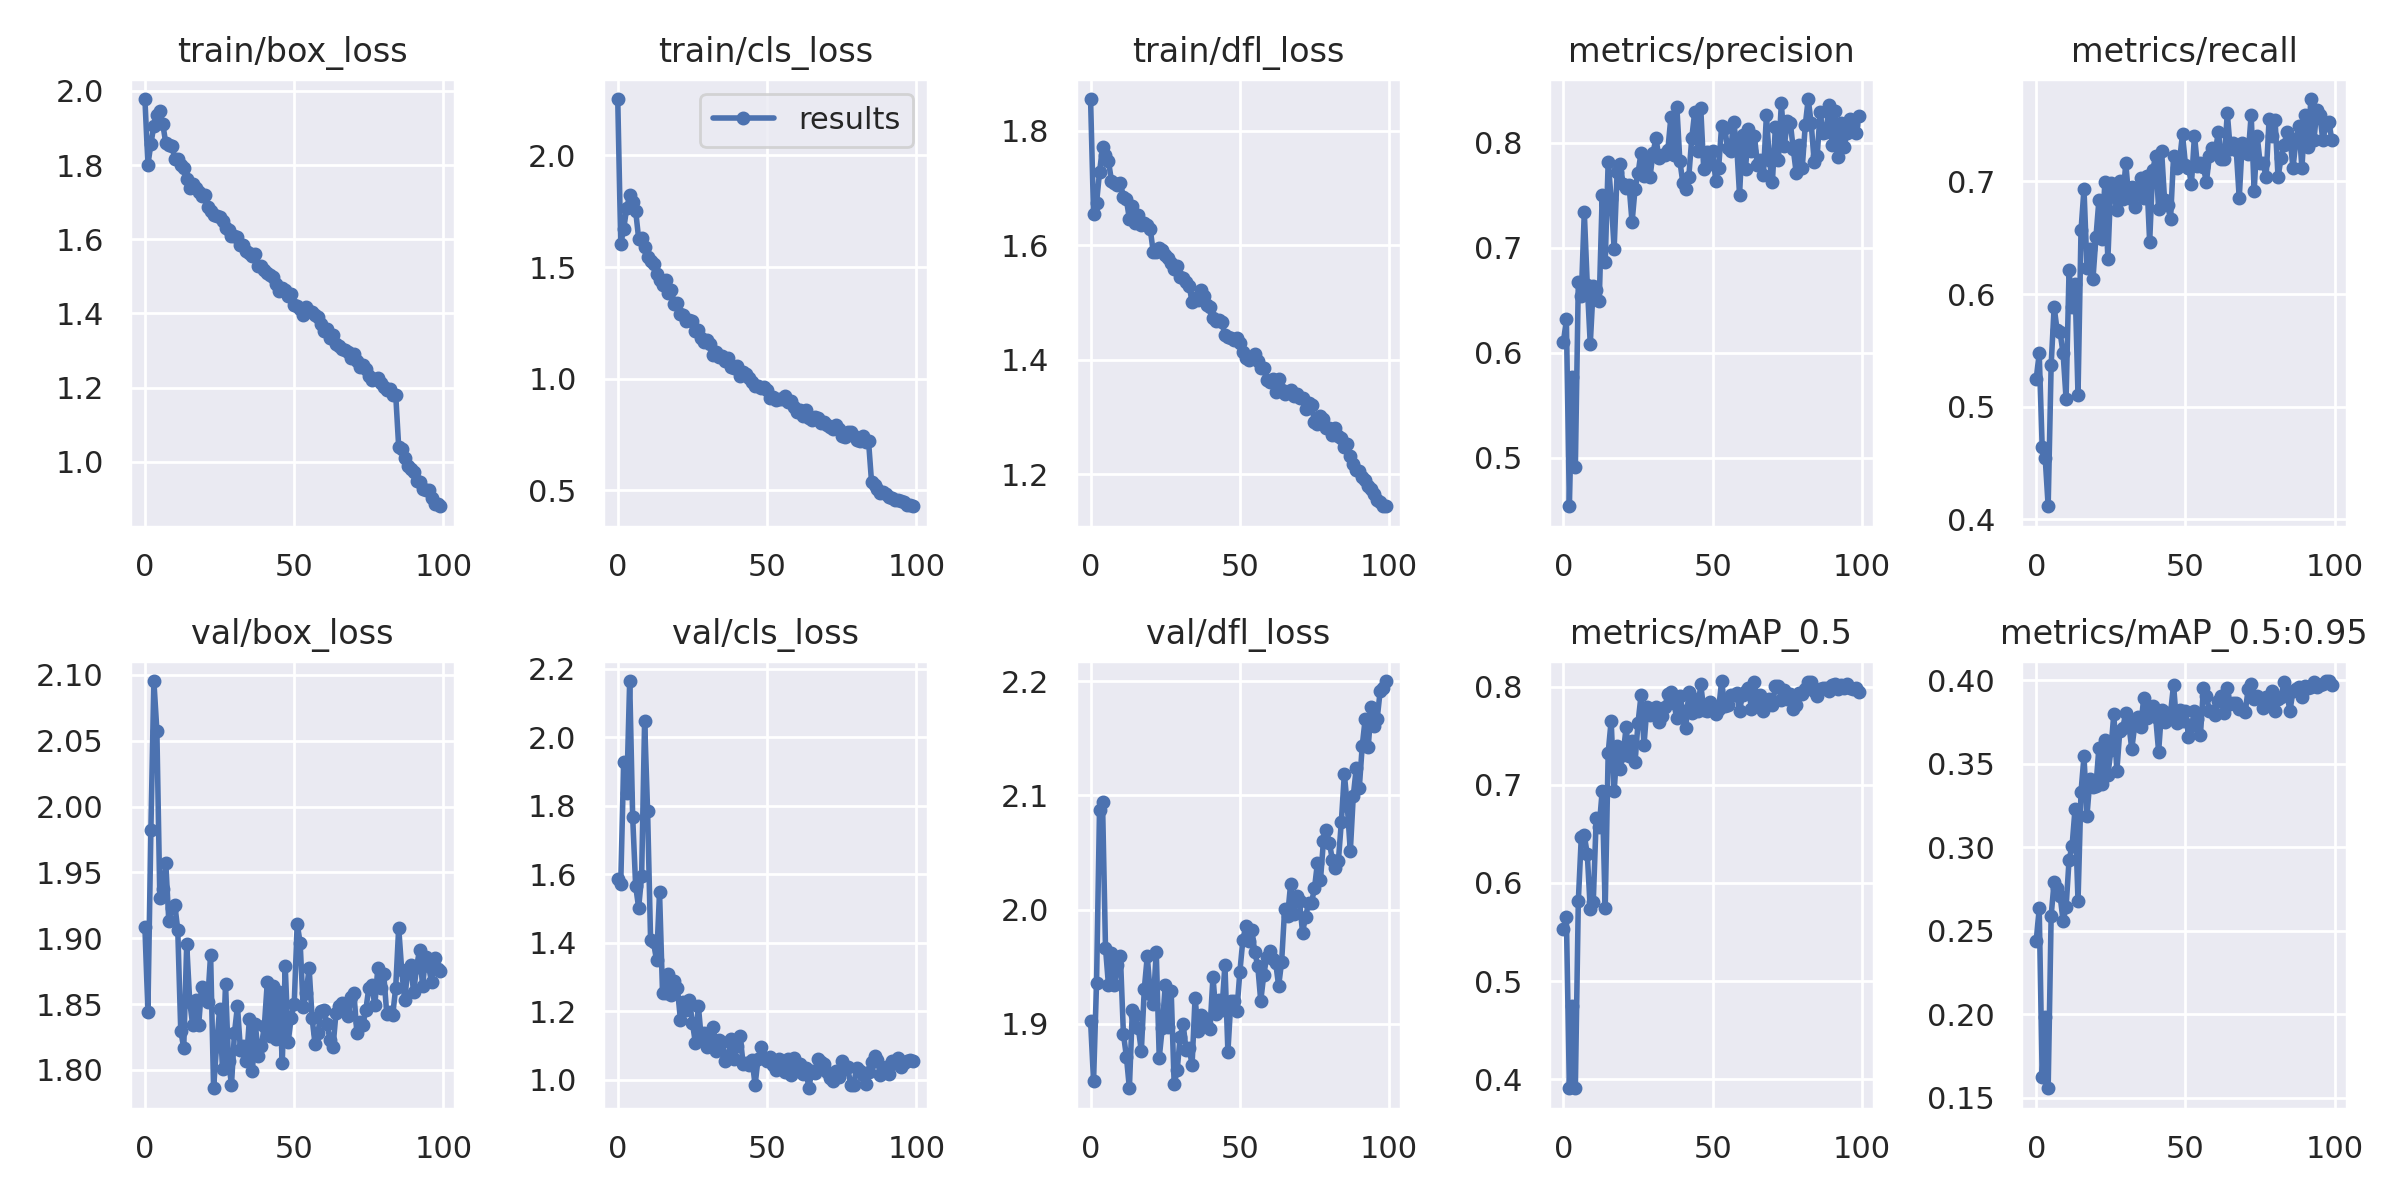

In [11]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/Research/Pothole/yolov9/runs/train/exp7/results.png', width=600)

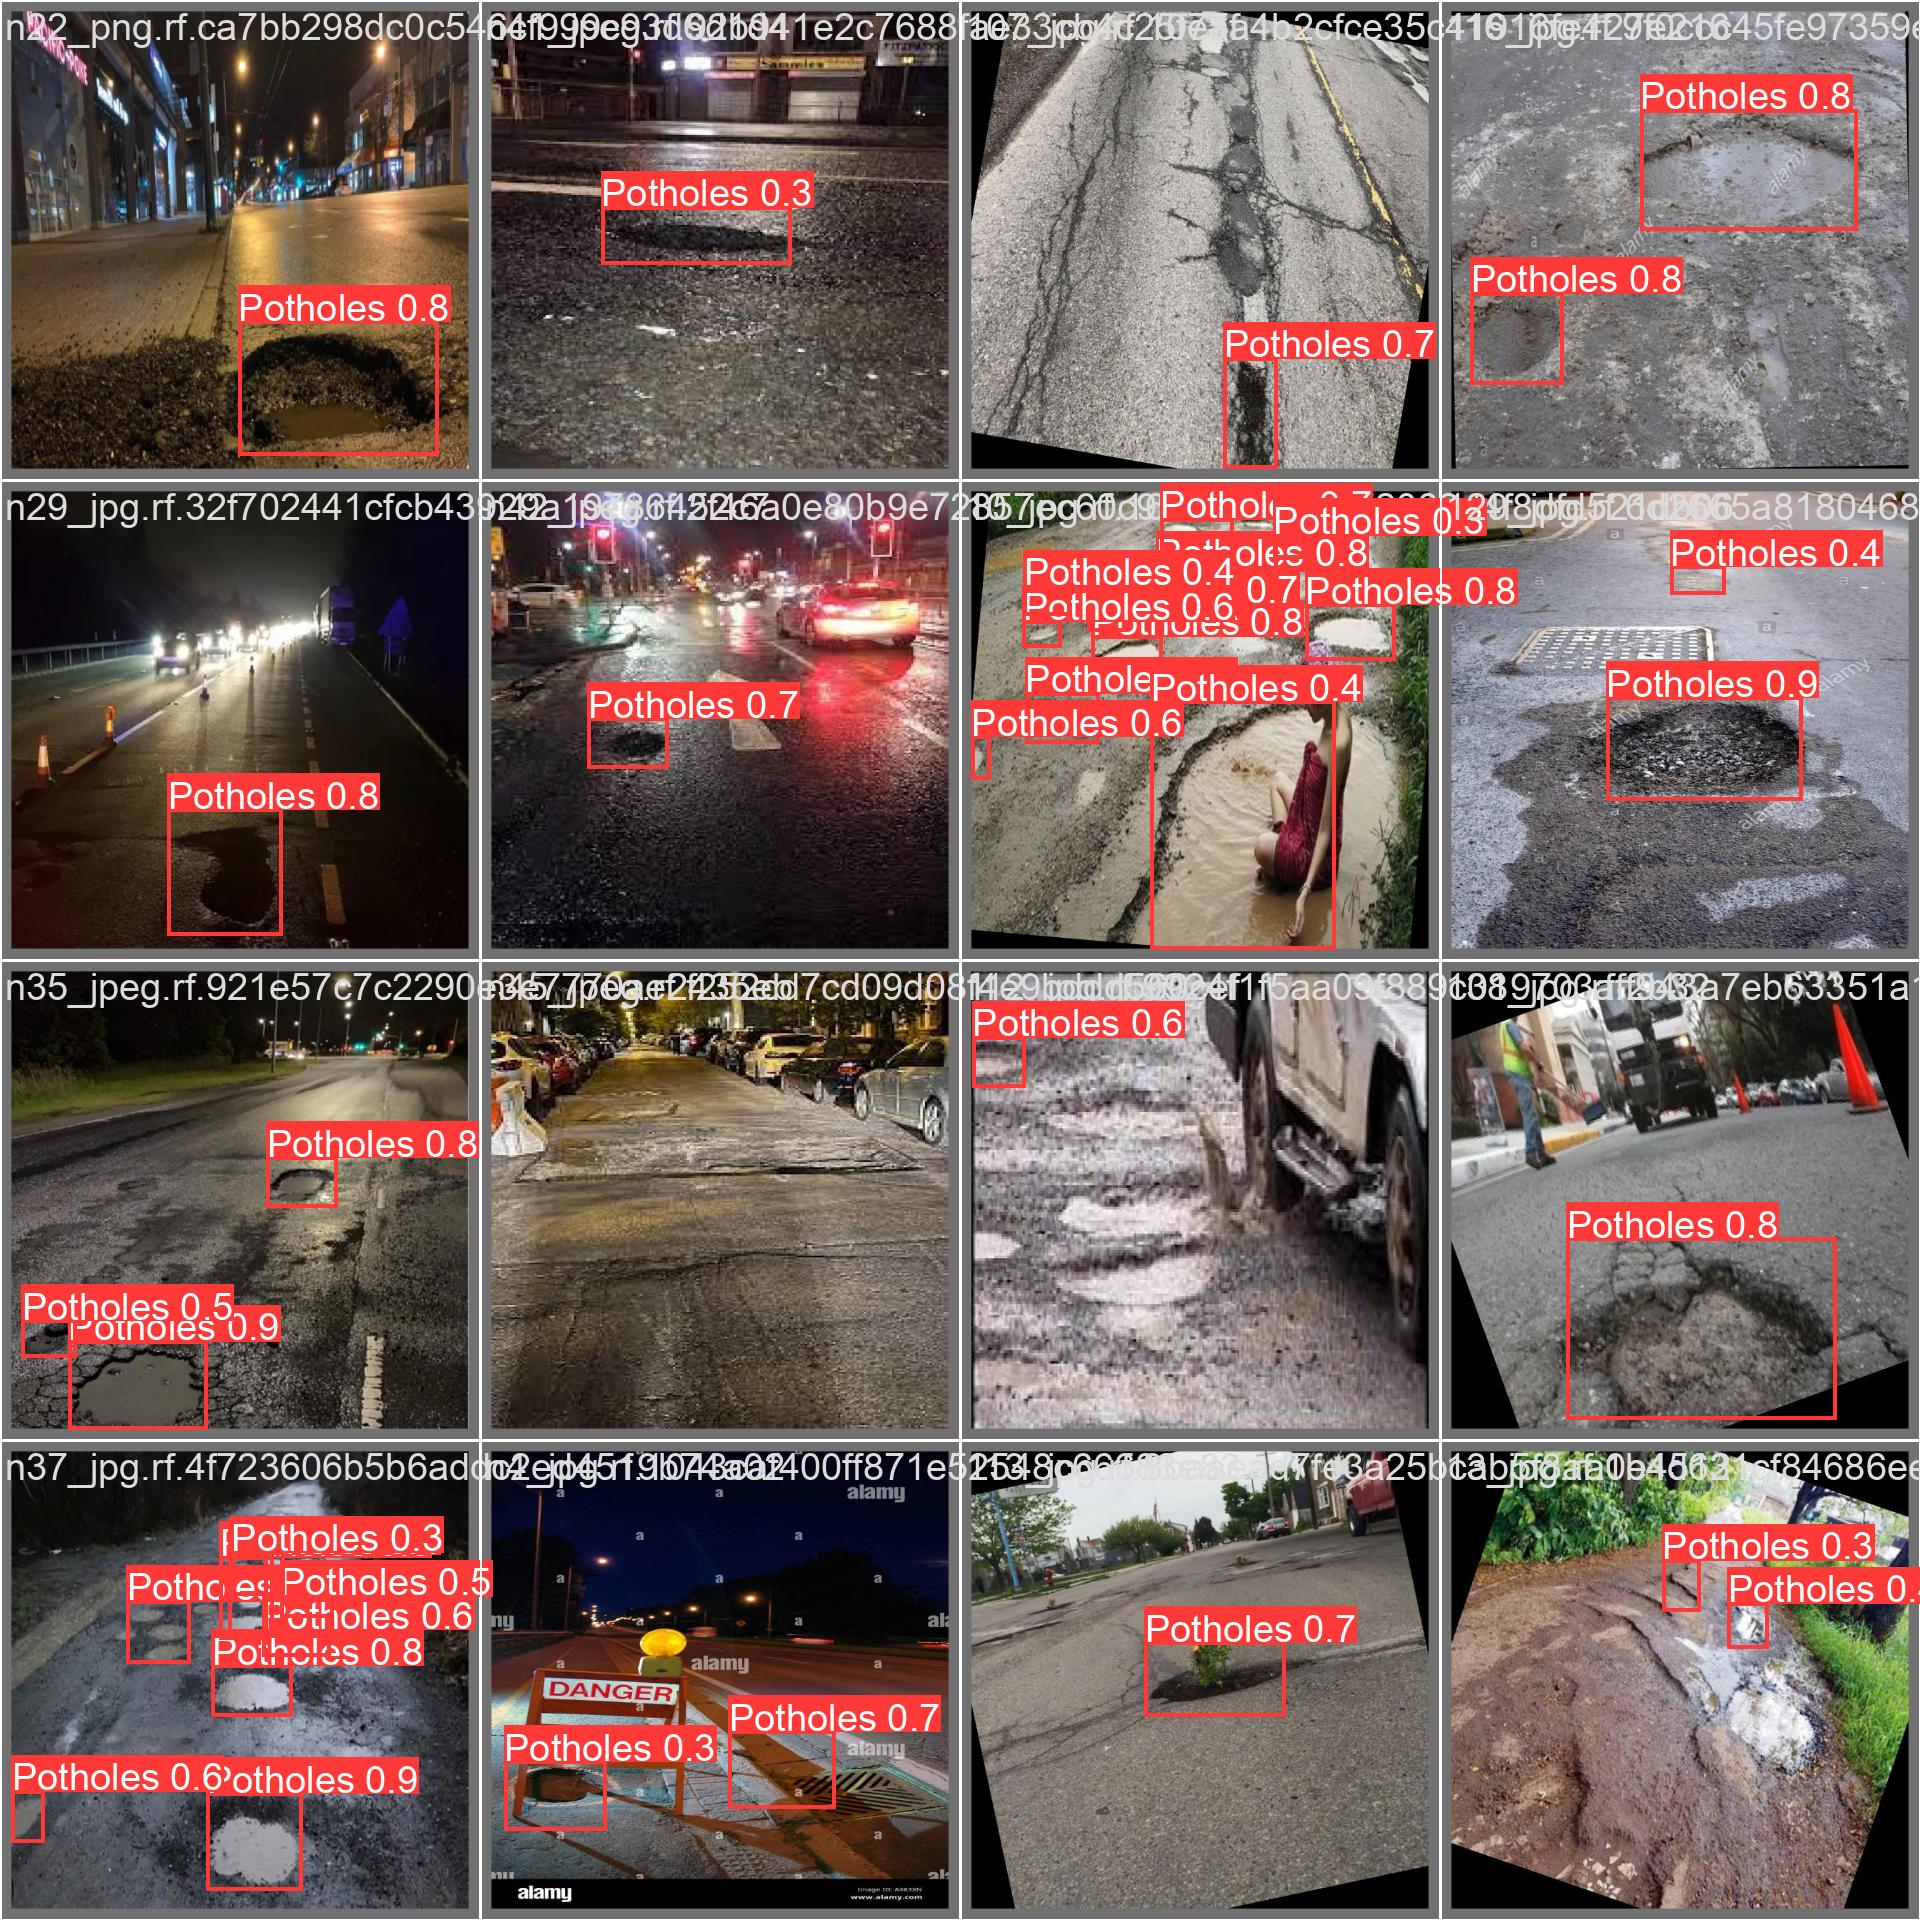

In [16]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp7/val_batch0_pred.jpg", width=1000)

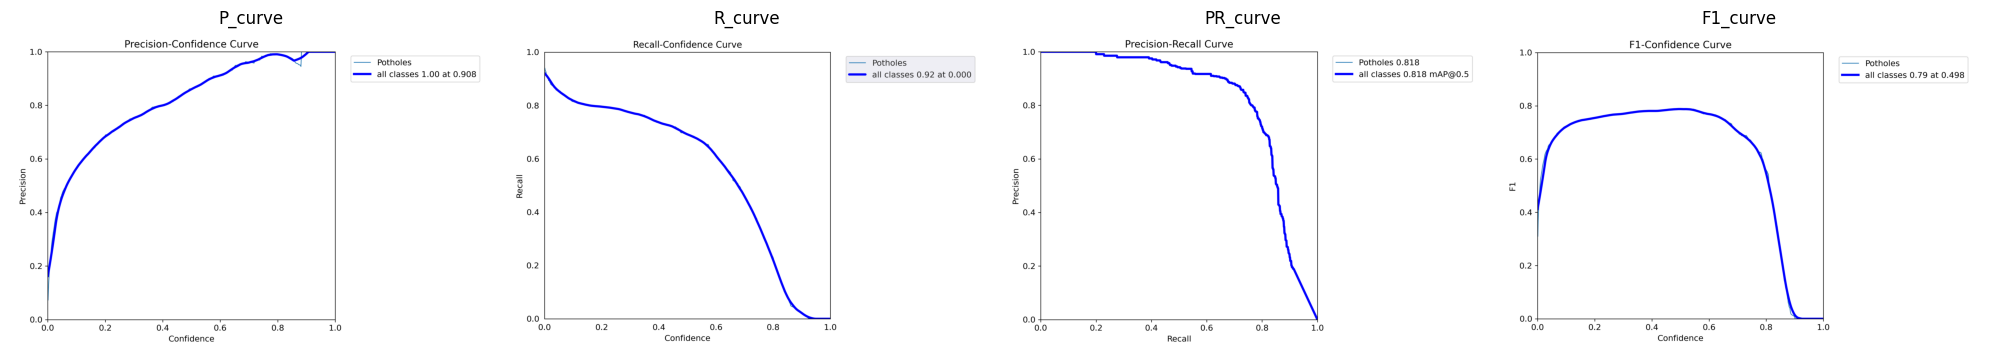

In [12]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

# Path to the folder containing the curve images
folder_path = '/content/drive/MyDrive/Research/Pothole/yolov9/runs/train/exp7/'

# List of image filenames
images = ['P_curve.png', 'R_curve.png', 'PR_curve.png', 'F1_curve.png']

# Create a figure and subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 8))

# Loop through images and display them in subplots
for i, image_name in enumerate(images):
    # Load the image
    img = mpimg.imread(os.path.join(folder_path, image_name))
    # Display the image in the corresponding subplot
    axs[i].imshow(img)
    # Remove axis for clarity
    axs[i].axis('off')
    # Set title for each subplot
    axs[i].set_title(image_name.split('.')[0])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
%cd {HOME}/yolov9

!python detect.py \
--img 640 --conf 0.25 --device 0 \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt \
--source /content/drive/MyDrive/Research/Pothole/yolov9/PD/test/images

/content/drive/MyDrive/Research/Pothole/yolov9
detect: weights=['/content/drive/MyDrive/Research/Pothole/yolov9/runs/train/exp7/weights/best.pt'], source=/content/drive/MyDrive/Research/Pothole/yolov9/PD/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLO requirements "gitpython" "ipython" "torch>=1.7.0" "torchvision>=0.8.1" not found, attempting AutoUpdate...
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  

In [15]:
!python /content/drive/MyDrive/Research/Pothole/yolov9/val_dual.py \
--img 640 --batch 8 --conf 0.25 --iou 0.7 --device 0 \
--data /content/drive/MyDrive/Research/Pothole/yolov9/PD/data.yaml \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt

val_dual: data=/content/drive/MyDrive/Research/Pothole/yolov9/PD/data.yaml, weights=['/content/drive/MyDrive/Research/Pothole/yolov9/runs/train/exp7/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.25, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov9/runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

/content/drive/MyDrive/Research/Pothole/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURI

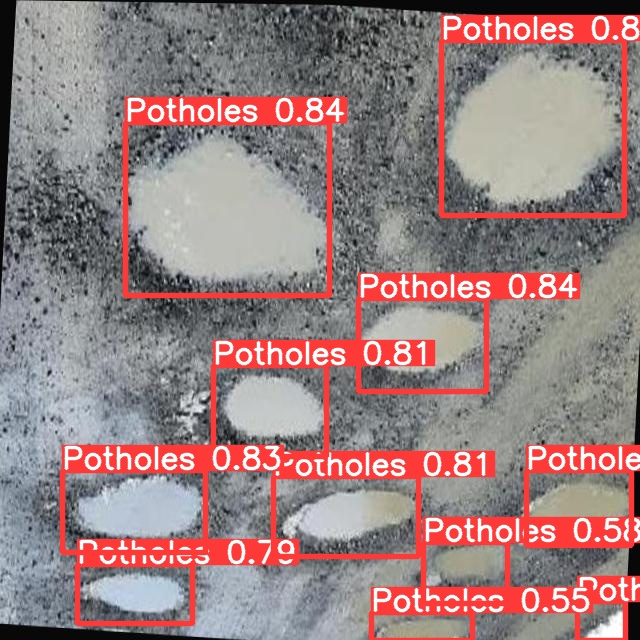

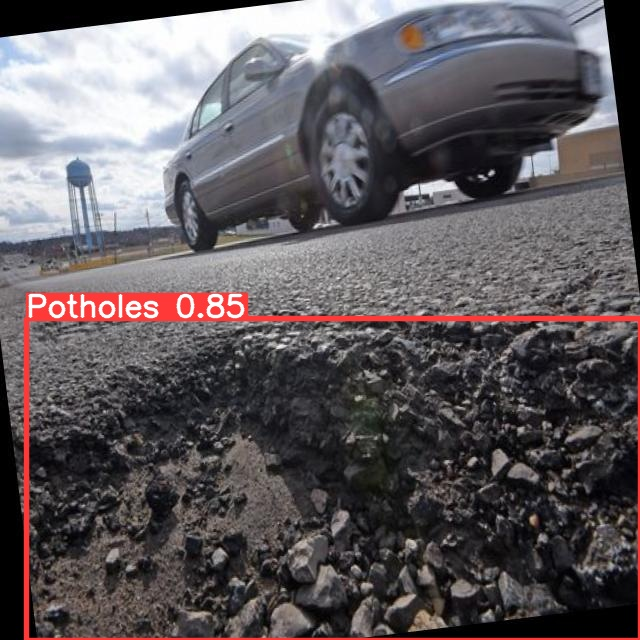

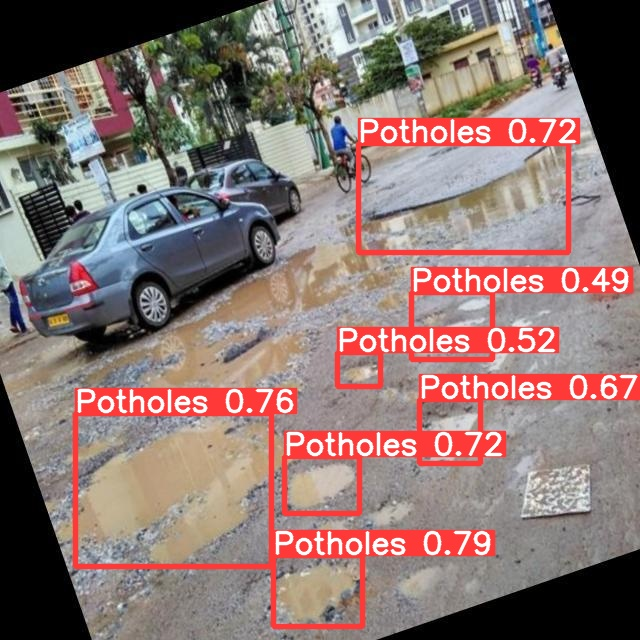

In [26]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/Research/Pothole/yolov9/PD/data.yaml \
--weights /content/weights/gelan-c.pt \
--cfg /content/drive/MyDrive/Research/Pothole/yolov9/models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml



/content/drive/MyDrive/Research/Pothole/yolov9
2024-09-01 18:27:06.973887: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-01 18:27:06.992149: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 18:27:07.013626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 18:27:07.020136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 18:27:07.0358